# Phase 2 Project - Flatiron School's Data Science Program
<ul>
    <li>Student name: Orlando Vilar</li>
    <li>Student pace: self paced</li>
    <li>Scheduled project review date/time: tbd</li>
    <li>Instructor name: Morgan Jones</li>
    <li>Blog post URL:</li>
</ul>

## Overview
I investigate a dataset of housing prices in King County - WA. Using a regression framework, under two specific settings: causal and prediction I delineate which factors are the most relevant to housing prices and how can one accurately predict the price of a real state in King County.

## Business Understanding
The purchase of a house is one of the biggest investments that one could make. House as an asset is deeply ingrained in our culture. As such, the relevance of point out which features are the most representative when assessing a property's value are paramount.

I argue that the housing price analysis is relevant for a wide array of audiences, such as: realtors, constructors, investment agents and the general public that have an interest or live in the King County area.

## Data Treatment and Analysis

As usual, we start by importing the libraries that we are going to use throughout this project and start with the typical data inspection/cleaning/treatment activities. Further on, we will discuss the basic characteristics of our dataset. Lets get to work!

In [1]:
#Starting by importing all the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting our first DataFrame with King County data and caling head for a general visualization
df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### The Dataset
General characteristics of our DataFrame shows that we have 21,597 rows and 21 columns. These columns have several data types, such as integers, floats and objects. By calling the info method we can inspect the variables. It is worth mentioning that some variables that have a numerical data type, such as <b>zipcode</b> or <b>lat</b>, may require some sort of enconding - since they share characteristics of categorical variables. But first, lets clean out - check the consistency - of our data.

In [2]:
#Checking the dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
#Converting dates to Datetime
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')

On an overall inspection, most of the variables have non-null values, with the exception of <b>waterfront</b>, <b>view</b> and <b>yr_renovated</b> variables. Respectively, these variables have 2,376, 63 and 3,842 missing values. For the last one, since we don't have a value for the year it was renovated, we will substitute missing values by 0. This can be justified by the fact that, it could be the case that when this dataset was being created/evaluated whenever a property did not perform any renovation, the surveyor didn't list that characteristics. 

We argue that by substituting missing values to 0 is a reasonable approach. The only effect that one would expect is to crowd out potential positive renovation effects (both statistically and economically), since our sample will be tilted towards houses that were not renovated. Furthermore, when analyzing the coefficient effects under a causal inference approach, the magnitude and sign of the coefficient should take this into account. Let's take a deeper look into those.

After inspecting the yr_renovated variable after our adjustment, it seems that this variable could be put to better use if it was considered a categorical one, that is, whether a house was renovated or not. More about this later when we get to one-hot encoding.

In [4]:
#Checking the NaN
(df.isna() == True).sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Evaluating 'view'
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [6]:
# Evaluating 'waterfront'
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
# Evaluating 'yr_renovated'
print(df['yr_renovated'].value_counts())
print('There are ', df['yr_renovated'].isna().sum() ,' missing values.')

#Filling NaN as 0
df['yr_renovated'] = df['yr_renovated'].fillna(0)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
There are  3842  missing values.


### Missing values assessment
From the information above, we can see that the missing values are indeed missing, i.e. they haven't been assigned to a particular categorization. We can perform some ad-hoc treatment to those variables, however this could influence our results. There are variables that are easier to be interpreted, such as 'yr_renovated'.

A 'yr_renovated' value of 0 (or even missing) might indicate that this house is new or it has never been renovated. By cross-referencing with the 'date' and 'yr_built' variables it is simple to make this sort of assessment (more about this later).

The variable 'waterfront' can also be treated in almost similar fashion. Since we have zipcodes, we can try to cross reference and find the latitute and longitude from a given area and from that infer whether it could be have a waterfront or not. This approach is more fragile, since zipcodes might encompass a considerable area, bringing more noise than signal to our analysis.

Finally, one could assume that 'view' can be highly correlated with 'waterfront'. Most of the values from this variable are set to none, so it is not the most informative one. Note how the value of 'NONE' are quite similar to the ones that have 'NO' (17,312 rows). Taking that into consideration, and also assuming that these variables may posit strong correlation among themselves (from a causal inference point of view), we should stick with 'view' and discard 'waterfront' from our analysis.


In [8]:
#Number of rows where view is 'NONE' and 'waterfront' is 'NO'
(df[(df['view'] == 'NONE') & (df['waterfront'] == 'NO')]).shape[0]

17312

Checking now the year that a house was renovated, we can infer that most of the houses that have a renovation date of 0 are new houses. Even though not precise of having the year that it was build, one can lean towards the direction that houses that are newer wouldn't require renovation. However, it doesn't seem to be the case. The median of 'yr_built' is 1976. So half of the houses in our distribution were build after 1977, whereas the newest house is from 2015! 

It seems that we are good to go! Next step, lets check the descriptive statistics of our dataset.

In [9]:
#Checking the year that a house was sold when the renovation date is 0
year_renew = df[(df['yr_renovated'] == 0)]

#Checking the years that it was sold
year_renew['date'].dt.year.value_counts()

#Describing the year that a house was built
year_renew['yr_built'].describe()

count    20853.000000
mean      1972.125114
std         28.974784
min       1900.000000
25%       1953.000000
50%       1976.000000
75%       1998.000000
max       2015.000000
Name: yr_built, dtype: float64

### Descriptive Statistics - Numerical Variables
Next we select only the numerical variables so we can check the overall characteristics of our data. Under the set of variables listed below (price, bedrooms, bathrooms, sqft_living, sqft_lit, floors, sqft_above, yr_built, yr_renovated, sqft_living15, sqft_lot15) we have no observations missing (all with 21,597 entries).

Plotting the histograms of our numerical variables we can visualize their distribution. Variables such as sqrft_lot, sqrft_lot15 and yr_renovated have most of their values concentrated around 0 (zero). The floor variable looks like it could be set up as a category, rather than a numerical value. The same thing can be thought of bedrooms and bathrooms.
Besides that, all other variables that we set as numeric look fairly normal without any sort of adjustment. However, that doesn't rule out the fact the further into our analysis we will make any transformation.

Interestingly, the variable sqft_basement is defined as an object. By inspecting the variable, we see a '?' as a value. This could be a type or even a mistake when the surveyor didn't know what to list. Lets correct that and change the variable's datatype to the most appropriate one.

In [10]:
#Transforming sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
207.0         1
516.0         1
588.0         1
176.0         1
1275.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
#Changing the '?' to 0
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0

#Checking - it seems to be working
df['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
861.0         1
2120.0        1
3500.0        1
1275.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
#Transforming sqft_basement to float
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [13]:
#Separating only the numerical variables to check their descriptive statistics
numerical = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
             'floors', 'sqft_above', 'sqft_basement', 'yr_renovated',
    'sqft_living15', 'sqft_lot15']

#Checking our numerical variables
df[numerical].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,68.758207,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,364.037499,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


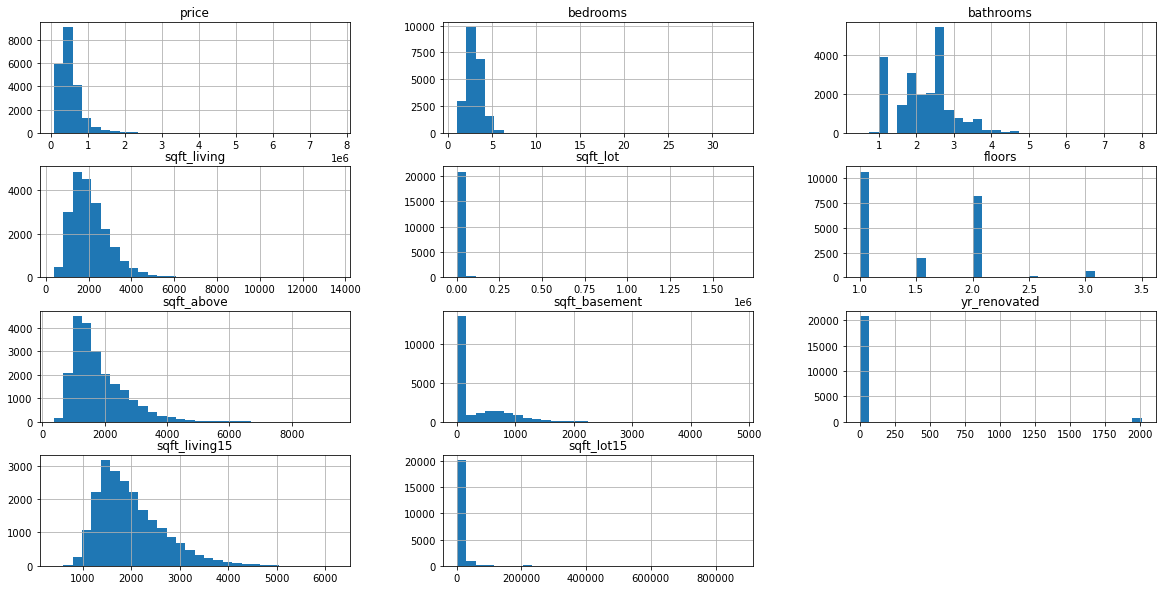

In [14]:
df[numerical].hist(figsize = [20,10], bins = 30);

### Checking the Categorical Variables
Now, we inspect the categorical variables, i.e. features that indicate some sort of categorization and are best used when transformed into dummy variables. We have already seen that some of these have missing values (e.g. waterfront). At the sime time, we saw that 'yr_renovated' could be treated as categorical variable that will have a value of 1 whenever a property was renovated and 0 otherwise.

Furthermore, as we discussed - we can drop waterfront since it share resemblances to view. That is, they could be capturing the same thing but in different ways.



In [15]:
#Adjusting yr_renovated
df.loc[df['yr_renovated'] !=0, 'renovated'] = 1
df['renovated'] = df['renovated'].fillna(0)

In [16]:
#Checking our categorical variables, except renovated that was already encoded
categorical = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'bedrooms', 'floors', 'bathrooms']

In [17]:
#Adjusting NaN - only the view variable
df['view'] = df['view'].fillna('NONE')

#Dropping 'waterfront'
categorical.remove('waterfront')

#Category Encoding
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['yr_built'] = df['yr_built'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')

### Didn't you forget about something?
Wait! But how about latitute and longitude? Well, we can use those variables, combine them to create coordinates and try to map each city within King County. After, wee can query those coordinates and find relevant information using the library GeoPy <a href = 'https://towardsdatascience.com/things-to-do-with-latitude-longitude-data-using-geopy-python-1d356ed1ae30'>reference</a>.

In [18]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent = 'king_county')
 
    
#Rounding Lat and Long - doing this to aggregate and parse the data with geocoder
df['lat'] = df['lat'].round(2).astype('str')
df['long'] = df['long'].round(2).astype('str')
df['location'] = df[['lat', 'long']].agg(', '.join, axis = 1)
unique_location = df['location'].unique().tolist()


In [19]:
#Creating a Location Dictionary so we can parse it faster using Pandas. Had to do it because it was taking too long
loc_dict = {}
for location in unique_location:
    loc_split = location.split(',')
    loc_split = [float(x) for x in loc_split]
    loc_dict[location] = locator.reverse((loc_split[0], loc_split[1])).raw.get('address')
    
#Mapping City and Town
city_town = {}
for key, value in loc_dict.items():
    try:
        city_town[key] = loc_dict[key]['town']
    except KeyError:
        city_town[key] = loc_dict[key].get('city')

#Now we map according to each location and transforming it into a category so we can encode it
df['city_town'] = df['location'].map(city_town)
df['city_town'] = df['city_town'].astype('category')

Using this approach, we end up with 21,507, losing just a few observations from our overall sample. Besides that, we can also check that close to 30% of our sample encompasses houses from the Seattle area. Using this sort of geolocation procedure, we can then apply one-hot encoding techniques to find dummy variables with respect to a given property's location. 

In [20]:
#How many observations do we end up with?
print('We have', df['city_town'].value_counts().sum(), 'city/town non-null observations.')

#Checking the overall gist of the city-town location
df['city_town'].value_counts()

We have 19807 city/town non-null observations.


Seattle                    7002
Renton                     1325
Bellevue                   1293
Kent                        978
Kirkland                    955
Sammamish                   907
Auburn                      785
Federal Way                 730
Redmond                     628
Shoreline                   573
Issaquah                    529
Maple Valley                489
Burien                      424
Mercer Island               281
Snoqualmie                  275
Des Moines                  274
Kenmore                     266
Covington                   258
Cottage Lake                238
Union Hill-Novelty Hill     218
Enumclaw                    216
Bothell                     199
SeaTac                      181
Lake Forest Park            167
Woodinville                 161
Duvall                      140
Tukwila                     103
North Bend                   66
Vashon                       35
Carnation                    26
Edmonds                      25
Tacoma  

In [21]:
#Adding city_town to the list of categorical variables so we can encode them all
categorical.append('city_town')

#Creating dummy variables out of categories
cat_dummies = pd.get_dummies(df[categorical], drop_first = True)

In [22]:
#Dropping the features that were already encoded
df = df.drop(['view', 'condition', 'grade', 'waterfront', 'yr_built', 'location', 'lat', 'long', 'bedrooms',
             'floors', 'bathrooms'], axis = 1)

#Concatenating DataFrames
df = pd.concat([df, cat_dummies], axis = 1)

### Correlation among numerical features
Now that we treated/adjusted our categorical variables. Lets dive deeper into our numerical ones. One problem that may arise when running our regressions is a high correlation between two variables. More precisely, a high correlation denotes a linear relationship between pairs and that violates the assumptions of regression models. We then reccur to the correlation analysis of our numerical features data.

Using Seaborn's Heatmap we can inspect visually which features correlate the most among themselves. Dealing with such a long list of variables might be too overwhelming, so I adapt one code from Flatiron's School 'Multicollinearity of Features' class, listing only the correlations that fall within the interval of 0.70 and 1. 

We then see that pairs (sqft_above, sqft_living), (sqft_living15, sqft_living) and (bathroom, sqft_living) fall between the interval above 0.75, but below 1. These variables could impose problems to our identification strategy so we will drop them accordingly.

Besides that, (sqft_lot15, sqft_lot) also have a high positive correlation coefficient so for the sake of consistency, we could drop these '15' variables. More conclusively, the variables with 15 appended to their names indicate the characteristics of the 15 nearest neighbors. We argue that the city/town location already embeds this sort of indication, so we don't see any sort of problem to drop those features.

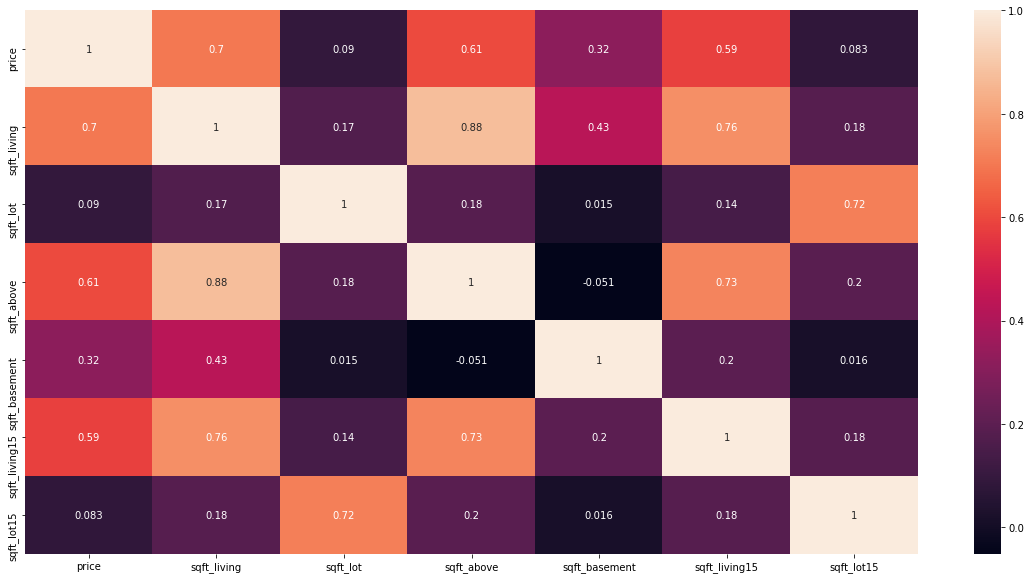

In [23]:
numerical = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

#Using Seaborn's Heatmap
fig = plt.subplots(figsize = (20,10))
sns.heatmap(df[numerical].corr(), annot = True);

In [24]:
#Creating a Matrix for easier inspection - using the code from Flatiron School's Correlation classe, slightly adapted
df_corr=df[numerical].corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_0', 'level_1'], inplace = True)
df_corr.columns = ['correl']

#Cleaner correlation Matrix
df_corr[(df_corr.correl > 0.70) & (df_corr.correl < 1)]

,correl
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, sqft_living15)",0.731767
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_lot, sqft_lot15)",0.718204
"(sqft_living, price)",0.701917


In [25]:
#Generating a second DataFrame for prediction, before transformation
df_pred = df

#Dropping highly correlated features and other variables that we won't use
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode', 'yr_renovated', ], axis = 1)

The next step while working with numerical variables is to transform them, so we keep in mind the regression framework assumptions. We saw previously how the variables may present skewness or lack of symmetry. So, in order to attenuate these effects, a log transformation will be performed on the numerical variables. 

After that step, we scale each variable. This procedure allows to mitigate the effect of different coefficient estimates masking the 'economic significance' (that is, estimates that are too big or small because of scale), also it will make coefficients comparable under a causal inference setting.

By calling a histogram of our adjusted and then scaled features, we can conclude that sqft_basement will yield little information to our setting. It is worth noting the effects on the price, sqft_living and sqft_lot variables. These are continuous in their nature and the effect of these transformations goes as expected. 

One could questione whether bedrooms, floors or even yr_built could be deemed as categorical. The quick answer would be yes, however, there is no loss of interpretation once we are scaling everything. So the attentive analyst/reader should think of listing the effects in terms of standard deviation of each feature.

Our next step is running the regression!


In [26]:
#We call our numerical variables again, without the ones that we already dropped
numerical_adj = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement']

for feature in numerical_adj:
    df[feature] = np.log(df[feature])
    df[feature] = (df[feature] - np.mean(df[feature])) / np.std(df[feature])


/Users/orlandovilar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


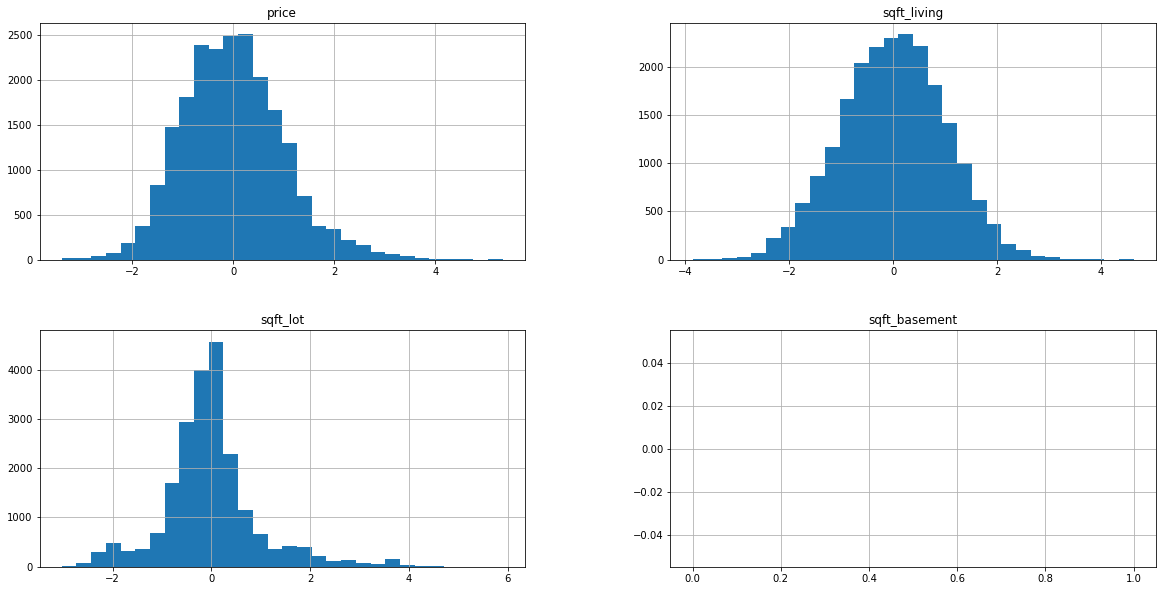

In [27]:
df[numerical_adj].hist(figsize = [20,10], bins = 30);

In [28]:
df = df.drop(['sqft_basement'], axis = 1)

#Dropping missing variables after adjustments
df = df.dropna(axis = 0)

## Regression Framework - Causal Inference
The first part of our two-folded suggestion will focus on causal inference, that is, what features are the ones that can explain the best housing prices. We start with a simple baseline model and test alternatives to see how it performs. 

More specifically, our dependent variable will be 'price' and the other features will be used as independent variables. We start by importing the Ordinary Least Squares from the Statsmodels library.

By regressing price (outcome/target/dependent variable) on sqft_living (independent variable/predictor) we are able to explain 44% of the variation in prices. The t-statistic and p-value denotes the significance under the usual statistical levels (even at 1%) so we can reject the null hypothesis of no effect of sqft_living on housing prices. A one standard deviation change to sqft_living will provide a change of 0.66 standard deviation in housing prices!

In [29]:
from statsmodels.formula.api import ols
#Transforming variables to list
outcome = df['price'].tolist()
predictor = df['sqft_living'].tolist()
formula = 'outcome~predictor'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.565e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:26:12   Log-Likelihood:                -22079.
No. Observations:               19807   AIC:                         4.416e+04
Df Residuals:                   19805   BIC:                         4.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0075      0.005      1.437      0.151      -0.003       0.018
predictor      0.6630      0.005    125.119      0.000       0.653       0.673
==============================================================================
Omnibus:                      110.773   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.934
Skew:                           0.098   Prob(JB):                     1.79e-20
Kurtosis:                       2.732   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

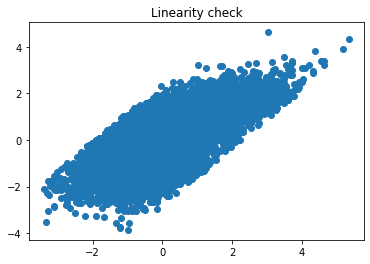

In [30]:
#Performing a Linearity Check
plt.scatter(df.price, df.sqft_living)
plt.title("Linearity check")
plt.show()

### Multiple Linear Regression
Now we add to our framework the other numerical variables. We can see that our R-squared goes to 0.452 explaining just a little more of the housing prices variation. The regression is significant at 1% - denoted by its F-statistic, and all of our regressors (ignoring the intercept, which seems to be centered around zero) are highly statistically significant. We reject the null hypothesis of no effect of these predictors at the 1% significance level.

More importantly, we can check the overall characteristics of our regression framework and how it aligns with its normality assumptions. The skewness is almost zero and the kurtosis 2.82 - which would indicate a fairly normal behavior (a 'perfect' normal shaped curve would have skewness 0 and kurtosis 3), however the Jarque-Bera (JB) statistic rejects the null hypothesis that errors are normally distributed. 

When using large samples the Jarque-Bera test is advisable instead of plotting Q-Q plots or checking the skewness/kurtosis. We can see that the Q-Q plot could be misleading in assessing the normality assumption. Even after applying log-linear transformation the Jarque-Bera test points to non-normality of residuals.

In [31]:
#Combining the other predictors
sqft_living = df['sqft_living'].tolist()
sqft_lot = df['sqft_lot'].tolist()

formula = 'outcome ~ sqft_living + sqft_lot'
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8175.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:26:12   Log-Likelihood:                -21886.
No. Observations:               19807   AIC:                         4.378e+04
Df Residuals:                   19804   BIC:                         4.380e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0024      0.005     -0.459      0.646      -0.013       0.008
sqft_living     0.6989      0.006    125.821      0.000       0.688       0.710
sqft_lot       -0.1183      0.006    -19.716      0.000      -0.130      -0.107
==============================================================================
Omnibus:                       73.478   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.487
Skew:                           0.113   Prob(JB):                     1.34e-15
Kurtosis:                       2.822   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

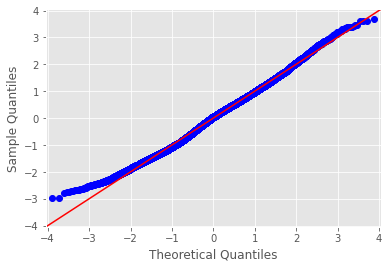

In [32]:
#Importing SciPy library
import statsmodels.api as sm
import scipy.stats as stats
plt.style.use('ggplot')

#Getting the residuals
resid = model.resid
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

### Checking whether our data is homoscedastic
The next step will check whether our data is homoscedastic, that is, the variance across random variables is homogeneous. If so, we aren't violating another assumption of the linear regression framework. By checking the plots from our regressors, there is no clear pattern of heteroskedasticity. Finally, the last step will be including our categorical variables and checking how our model performs.

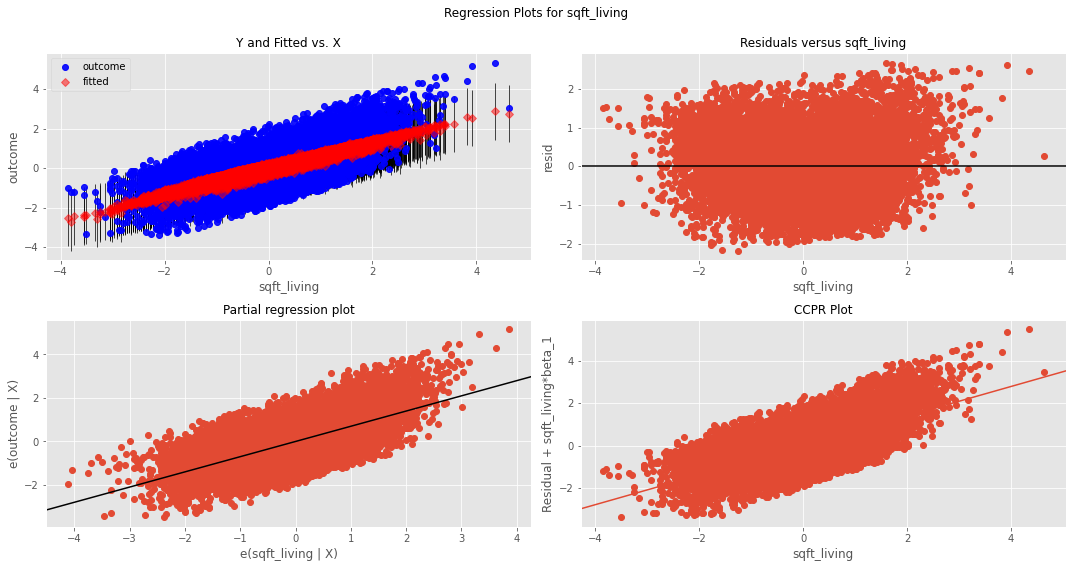

In [33]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig = fig)
plt.show()

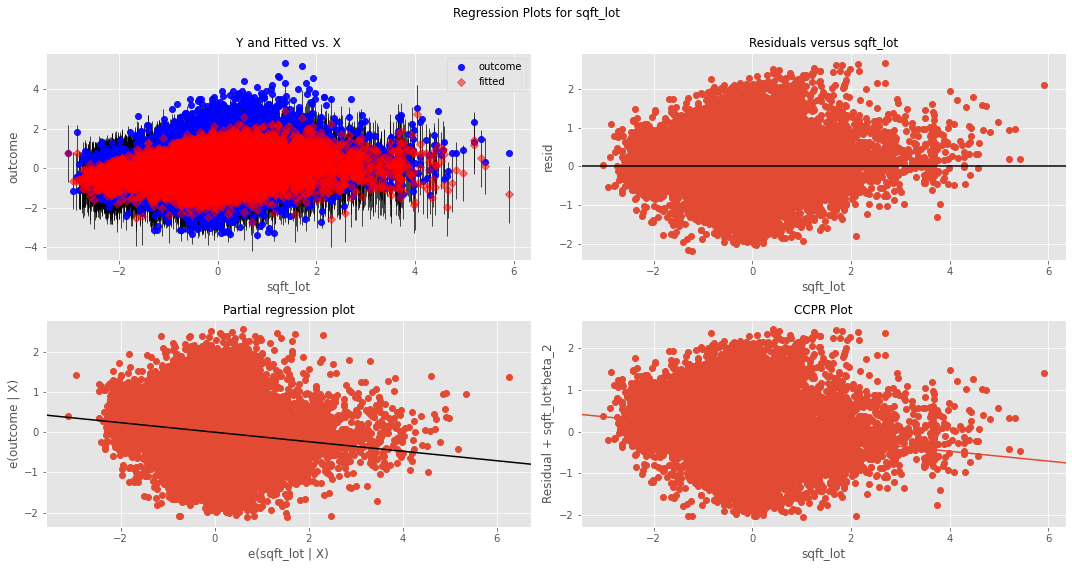

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_lot', fig=fig)
plt.show()

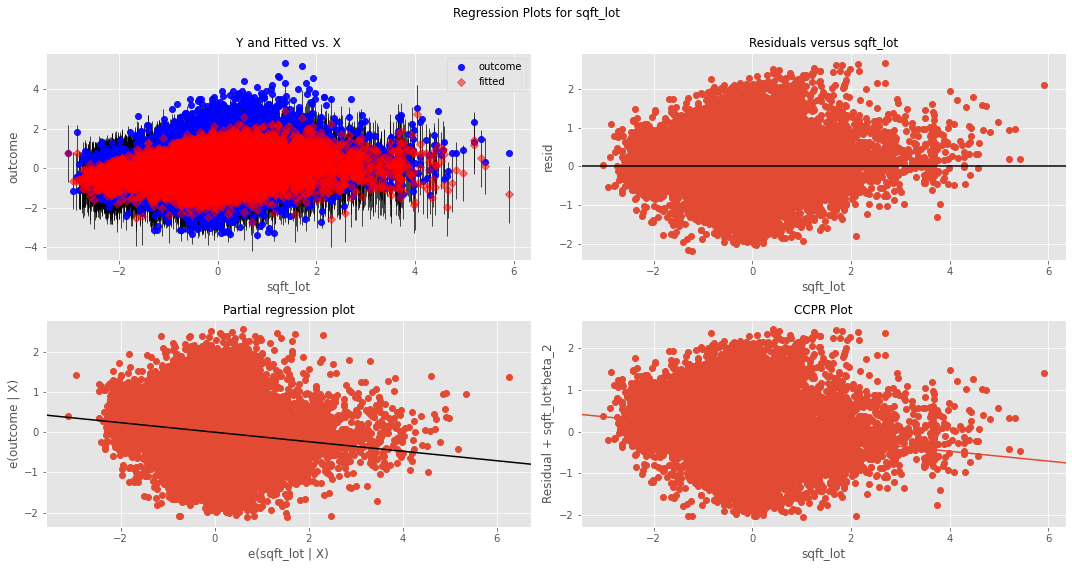

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_lot', fig=fig)
plt.show()

### The fully saturated model
Adding up all of our categorical variables to the previous model, we are able to achieve a better explanatory power. The R-squared (Adj. R-Squared) illustrates that we are able to explain 0.824 (0.822) of the housing price variation. Our model is quite extensive but a few points are worth noting.

Out of the variables that we used: grade_3_Poor, yr_built_1901, yr_built_1902, yr_built_1904, yr_built_1905, yr_built_1906, yr_built_1907, yr_built_1909, yr_built_1910, 1911, 1912, 1914, 1915, 1916, 1921, 1922, 1923, 1924, 1926 and 1927, are not statistically significant at the 5% level (p-value > 0.05). Furthermore, the variables that denotes the number of bedrooms are only significantly impacting value - that is, have an effect different than zero in accordance with usual statistical testing levels (5%) - when they are between the intervals of 5-7.

Interestingly, floor numbers are positively affecting price from 2 to 3, whereas bathrooms (with the exception of 5.75 bathrooms) are as well statistically and economically significant to housing prices. Finally, moving to the Location, we saw that Bellevue and Seattle are the most representative cities within our sample. For the sake of space, both of these towns/cities have a positive effect in prices (coefficients of 0.6473 and 0.3737 - respectively, both statistically significant at the 1% level). Houses in Mercer Island are the priciest ones (coefficient of 0.9047) within King County - statisticlly significant at the 1% level.

Still, the Jarque-Bera statistic still denotes that the normality assumption does not hold. We reject the null at the 1% level.

In [36]:
#Changing the name of columns, so we don't have any problems when calling these variables
dict_col = {}
for label, content in df.items():
    dict_col[label] = "".join(label.split('.'))

#Now removing spaces
for keys, value in dict_col.items():
    dict_col[keys] = '_'.join(value.split())

#Changing the name of the last column that could yield some problem
dict_col['city_town_Union Hill-Novelty Hill'] = 'city_town_Union_Hill_Novelty_Hill'

#Setting the final DataFrame as 'data'
data = df.rename(columns = dict_col)

#Removing the ones that aren't relevant
predictor_new = data.columns.tolist()
for col in ['id', 'date', 'price', 'city_town']:
    predictor_new.remove(col)

#Generating a formula and running the Model
pred_sum = '+'.join(predictor_new)
formula = 'price' + '~' + pred_sum
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     426.7
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:26:16   Log-Likelihood:                -10640.
No. Observations:               19807   AIC:                         2.171e+04
Df Residuals:                   19591   BIC:                         2.342e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.5606      0.269      2.087      0.037       0.034       1.087
sqft_living                           0.3324      0.007     48.729      0.000       0.319       0.346
sqft_lot                              0.0854      0.005     16.855      0.000       0.075       0.095
renovated                             0.1042      0.018      5.887      0.000       0.070       0.139
view_EXCELLENT                        0.6224      0.029     21.793      0.000       0.566       0.678
view_FAIR                             0.0618      0.028      2.201      0.028       0.007       0.117
view_GOOD                             0.1369      0.024      5.625      0.000       0.089       0.185
view_NONE                            -0.2036      0.015    -13.498      0.000      -0.233      -0.174
condition_Fair                       -0.2509      0.035     -7.106      0.000      -0.320      -0.182
condition_Good                        0.1068      0.008     13.604      0.000       0.091       0.122
condition_Poor                       -0.3949      0.080     -4.927      0.000      -0.552      -0.238
condition_Very_Good                   0.2066      0.012     16.956      0.000       0.183       0.231
grade_11_Excellent                    0.2265      0.028      8.135      0.000       0.172       0.281
grade_12_Luxury                       0.4525      0.056      8.130      0.000       0.343       0.562
grade_13_Mansion                      0.9097      0.146      6.246      0.000       0.624       1.195
grade_3_Poor                         -0.2422      0.425     -0.570      0.569      -1.075       0.591
grade_4_Low                          -1.6241      0.102    -15.936      0.000      -1.824      -1.424
grade_5_Fair                         -1.2721      0.038    -33.491      0.000      -1.347      -1.198
grade_6_Low_Average                  -1.1527      0.023    -50.821      0.000      -1.197      -1.108
grade_7_Average                      -0.7967      0.018    -43.394      0.000      -0.833      -0.761
grade_8_Good                         -0.5262      0.017    -31.467      0.000      -0.559      -0.493
grade_9_Better                       -0.2354      0.017    -14.201      0.000      -0.268      -0.203
yr_built_1901                        -0.0930      0.090     -1.032      0.302      -0.270       0.084
yr_built_1902                        -0.0777      0.094     -0.828      0.408      -0.262       0.106
yr_built_1903                        -0.1801      0.079     -2.279      0.023      -0.335      -0.025
yr_built_1904                        -0.0073      0.077     -0.094      0.925      -0.159       0.144
yr_built_1905                         0.0392      0.067      0.587      0.557      -0.092       0.170
yr_built_1906          

In [37]:
#Removing irrelevant regressors
for no_sig in ['grade_3_Poor', 'yr_built_1901', 'yr_built_1902', 'yr_built_1904', 'yr_built_1905', 'yr_built_1906',
              'yr_built_1907', 'yr_built_1909', 'yr_built_1910', 'yr_built_1911', 'yr_built_1912', 'yr_built_1914',
              'yr_built_1915', 'yr_built_1916', 'yr_built_1921', 'yr_built_1922', 'yr_built_1923', 'yr_built_1924',
              'yr_built_1926', 'yr_built_1927', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_8', 'bedrooms_9',
              'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'floors_15', 'floors_35', 'bathrooms_575', 'bathrooms_075',
              'bathrooms_65', 'bathrooms_675', 'bathrooms_75', 'bathrooms_775', 'bathrooms_80', 'city_town_Bothell', 'city_town_Carnation',
              'city_town_Cottage_Lake', 'city_town_Duvall', 'city_town_Edmonds', 'city_town_Issaquah', 'city_town_Kenmore',
              'city_town_Lake_Forest_Park', 'city_town_Maltby', 'city_town_Mountlake_Terrace', 'city_town_North_Bend',
              'city_town_North_Creek', 'city_town_Shoreline', 'city_town_Snoqualmie', 'city_town_Vashon', 'city_town_Woodinville',
              'city_town_Hobart']:
    predictor_new.remove(no_sig)
#New Predictors Adjusted
pred_sum_adj = '+'.join(predictor_new)
formula = 'price' + '~' + pred_sum_adj
model = ols(formula = formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     560.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:26:17   Log-Likelihood:                -10752.
No. Observations:               19807   AIC:                         2.183e+04
Df Residuals:                   19644   BIC:                         2.312e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.0123      0.059     17.129      0.000       0.896       1.128
sqft_living                           0.3219      0.006     51.786      0.000       0.310       0.334
sqft_lot                              0.0828      0.005     16.774      0.000       0.073       0.092
renovated                             0.1039      0.018      5.881      0.000       0.069       0.138
view_EXCELLENT                        0.6216      0.029     21.736      0.000       0.566       0.678
view_FAIR                             0.0657      0.028      2.335      0.020       0.011       0.121
view_GOOD                             0.1346      0.024      5.516      0.000       0.087       0.182
view_NONE                            -0.1999      0.015    -13.269      0.000      -0.229      -0.170
condition_Fair                       -0.2487      0.035     -7.027      0.000      -0.318      -0.179
condition_Good                        0.1090      0.008     13.867      0.000       0.094       0.124
condition_Poor                       -0.3884      0.080     -4.837      0.000      -0.546      -0.231
condition_Very_Good                   0.2073      0.012     16.991      0.000       0.183       0.231
grade_11_Excellent                    0.2370      0.028      8.512      0.000       0.182       0.292
grade_12_Luxury                       0.4859      0.055      8.815      0.000       0.378       0.594
grade_13_Mansion                      0.9562      0.142      6.734      0.000       0.678       1.235
grade_4_Low                          -1.6335      0.101    -16.136      0.000      -1.832      -1.435
grade_5_Fair                         -1.2991      0.038    -34.450      0.000      -1.373      -1.225
grade_6_Low_Average                  -1.1822      0.023    -52.524      0.000      -1.226      -1.138
grade_7_Average                      -0.8226      0.018    -45.278      0.000      -0.858      -0.787
grade_8_Good                         -0.5430      0.017    -32.616      0.000      -0.576      -0.510
grade_9_Better                       -0.2451      0.017    -14.781      0.000      -0.278      -0.213
yr_built_1903                        -0.1313      0.065     -2.008      0.045      -0.260      -0.003
yr_built_1908                        -0.1807      0.047     -3.858      0.000      -0.272      -0.089
yr_built_1913                        -0.1228      0.057     -2.137      0.033      -0.235      -0.010
yr_built_1917                        -0.1269      0.058     -2.192      0.028      -0.240      -0.013
yr_built_1918                        -0.1729      0.040     -4.293      0.000      -0.252      -0.094
yr_built_1919                        -0.0889      0.046     -1.919      0.055      -0.180       0.002
yr_built_1920          

Our final model has similar R-Squared values, explaining 82% of the housing price variation. So we can conclude some interesting facts out of this exercise: first, the regression assumptions (linearity, normality and homoskedasticity) are not 100% held. The normality assumption is violated, even after adjusting our variables. The other two assumptions are not violated so the attentive analyst should pay attention to this fact.

The numerical features that have an impact on prices are sqft_living and sqft_lot. A one-standard deviation to sqft_living has an impact of 0.32 standard deviations to price, furthermore a one-standard deviation to sqft_lot has an impact of 0.0829 standard deviation to prices. Turning now to our categorical variables, whether a house was renovated, has an excellent view, is in excellent condition, is a mansion, was recently built (after year 2010), has fewer bedrooms and 2.5 floors, more than 3 bathrooms and is located in Mercer Island will have the highest price.

## Regression Framework - Prediction

The last portion of our exercise will approach our regression framework from a prediction standpoint. That is, assuming certain real estate characteristics from a property in King County, how well does our model will be able to predict this asset's price?

We start by splitting our data into training and testing data. To avoid data leakage, we perform the train-test-split procedure on our DataFrame before transformation. We will also investigate the use of a polynomial features in our regression framework and finally assess the performance of our model.

In [65]:
#Setting the final DataFrame as 'data_pred', using the same dictionary technique as above. I could have used the same
#dictionary but it is safer to run it again
dict_col_pred = {}
for label, content in df_pred.items():
    dict_col_pred[label] = "".join(label.split('.'))

#Now removing spaces
for keys, value in dict_col_pred.items():
    dict_col_pred[keys] = '_'.join(value.split())

#Changing the name of the last column that could yield some problem
dict_col_pred['city_town_Union Hill-Novelty Hill'] = 'city_town_Union_Hill_Novelty_Hill'

#Setting the final DataFrame as 'data'
data_pred = df_pred.rename(columns = dict_col)

#Setting X and y variables
y = data_pred['price']
X = data_pred.drop(['id', 'date', 'price', 'yr_renovated', 'zipcode', 'city_town', 'sqft_basement'], axis = 1)

#For the train_test_split function, I keep the settings to default: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 28)

In [66]:
#Using FunctionTransformer - both train and test (X and y)
log_transform = FunctionTransformer(np.log, validate = True)

#Defining columns to be transformed - TRAIN DATA
log_cols = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above']

#New col names - TRAIN DATA
log_cols_adj = ['ln_sqft_liv', 'ln_sqft_lot','ln_sqft_liv15', 'ln_sqft_lot15', 'ln_sqft_abov']

#Log transform the training columns and convert them into a DataFrame - TRAIN DATA
X_train_log = pd.DataFrame(log_transform.fit_transform(X_train[log_cols]), 
                           columns = log_cols_adj, index = X_train.index)

#Replacing training columns with adjusted - TRAIN DATA
X_train = pd.concat([X_train.drop(log_cols, axis = 1), X_train_log], axis = 1)
    
#Now we repeat the same thing - TEST DATA 
X_test_log = pd.DataFrame(log_transform.transform(X_test[log_cols]), 
                          columns = log_cols_adj, index = X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(log_cols, axis = 1), X_test_log], axis = 1)

#Transforming dependent variable - TRAIN and TEST
y_train = y_train.apply(lambda x: np.log(x))
y_test = y_test.apply(lambda x: np.log(x))

After splitting our dataset intro train and test - using default settings (75% train - 25% test) we apply the log transformation. In the prediction case, since we are not interest in causal analysis and coefficient point estimates, the scaling procedures is not necessary to be applied on our variables.

After the log transformation is performed, I provide an example of the prediction baseline model. We can see that its performance is suboptimal. The mean squared error is very high using testing data. That means that we are not predicting well enough the pattern of prices and could be overfitting. More distinctively, the model is presenting a good at working with training data, however it fails to generalize to test portion (bias-variance trade-off).

Since our model is oversaturated with dummy variables, I assume these could be affecting the overfitting of our model. Lets check!

In [67]:
#Calling the LinearRegression from sklearn
linreg = LinearRegression()

#Fitting our regression - TRAIN DATA
linreg.fit(X_train, y_train)

#Generating predictions
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#Mean-Squared Error
train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test)

#Printing out our results
print('Mean Squared Error - Train:', train_mse)
print('Mean Squared Error - Test:', test_mse)

Mean Squared Error - Train: 0.04986738325921096
Mean Squared Error - Test: 3.1101070845923407e+20


After excluding several categorical variables, specially the list of year built it is clear that we are able to obtain a better predictive model. The Mean Squared Error for Training data increases, but at the same time the MSE for our Testing data falls considerable. The MSE estimate is pretty close one another(Train 0.065 vs Test 0.070), indicating a good balance between Bias and Variance, that is, our model is not overfitting and is able to provide good estimates with testing data!

In [68]:
#Dropping categorical that are still insignificant so we don't oversaturate our model
#Other categorical variables that are skewed towards a particular value are dropped as well
X_train_d = X_train.drop(['bathrooms_10', 'bathrooms_125', 'bathrooms_15', 'view_EXCELLENT',
                         'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
                         'condition_Poor', 'condition_Very_Good', 'renovated',
                         'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low',
                          'grade_8_Good', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
                          'grade_9_Better'
                         ], axis = 1)

X_test_d = X_test.drop(['bathrooms_10', 'bathrooms_125', 'bathrooms_15', 'view_EXCELLENT',
                         'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
                         'condition_Poor', 'condition_Very_Good', 'renovated',
                         'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low',
                          'grade_8_Good', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
                          'grade_9_Better'], axis = 1)

#Now creating a yr_built filter, from 
#https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
yr_built = [col for col in X_train_d.columns if col[:8] == 'yr_built']
X_test_d = X_test_d.drop(yr_built, axis = 1)
X_train_d = X_train_d.drop(yr_built, axis = 1)

#Calling the LinearRegression from sklearn
linreg = LinearRegression()

#Fitting our regression - TRAIN DATA
linreg.fit(X_train_d, y_train)

#Generating predictions
y_hat_train = linreg.predict(X_train_d)
y_hat_test = linreg.predict(X_test_d)

#Mean-Squared Error
train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test)

#Printing out our results
print('Mean Squared Error - Train:', train_mse)
print('Mean Squared Error - Test:', test_mse)


Mean Squared Error - Train: 0.06490549559292746
Mean Squared Error - Test: 0.07027063291089665


## Conclusion
In this project I worked with housing data from King County - WA. After cleaning the data and performing a preliminary overview, I provide two regression framework analysis using the dataset. The first one is a causal inference approach, where I explain 82% of housing price variation using a combination of numerical an categorical variables.

Starting with a baseline model, sqft_living is the numerical variable that is correlated the most with prices. From there, we add several numerical and categorical variables. The variables that have the greater impact on housing prices are: the squarefeet of the living area and the lot, whether a house was renovated, has an excellent view and it is in excellent condition too. If the property is a recently built 2.5-floored mansion, with fewer bedrooms and 3 bathrooms located in Mercer Island will have the highest price. In order to find the precise location of a property, I combine geolocation data with our dataset.

After concluding our causal approach, I provide a prediction framework. We see that using our fully saturated model while being fully useful in a causal approach unfortunately will not yield a good prediction using testing data. Then I adapt the model, skimming categorical variables then reaching a good balance between Mean Squared Errors from Training and Testing data (bias-variance trade-off).

### Potential Pitfalls and Further Research
It is worth noting that we see the regression framework failing to hold the normality assumption, so it could be the case the sample was not randomly drawn. From inspecting our dataset, it is clear that there is a profusion of properties within the Seattle area. Besides that, other assumptions are held (linearity, multicollinearity and homoskedasticity). 

Further research could try expanding the dataset, aggregating demographics from each area and the use of other numerical variables. Also the use of polynomial features in order to capture the behavior of housing prices is indicated.